In [23]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os

In [24]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(82944, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 78),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=82944, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=78, bias=True)
  )
)


In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [26]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [27]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [28]:
labels_df = pd.read_csv('annotations_encoded.csv', dtype={'Material': str,'Stained':str, 'Surface properties': str})

In [29]:
labels_df

,Unnamed: 0,No.,Object name,Material,Stained,Surface properties
0,0,1,Christmas bear,100000000000000000000000000000,100,10000000000
1,1,2,Lab-keys,110000000000000000000000000000,010,01100000000
2,2,3,Apricot,001000000000000000000000000000,001,10000000000
3,3,4,Round candle,010100000000000000000000000000,010,01100000000
4,4,5,Nut,000010000000000000000000000000,001,00010000000
...,...,...,...,...,...,...
995,995,996,lotion,000000010010000000000000000000,100,01100000000
996,996,997,cleansing milk,000000010010000000000000000000,100,01100000000
997,997,998,vogue deodorant,010000010000000000000000000000,100,01100000000
998,998,999,ALOI recording,010000010000000000000000000000,001,01100000000


In [30]:
#convert model label to folder name
def convert_label(model_label):
    for key, value in dataset.class_to_idx.items():
        if value == model_label:
            return key

In [31]:
#map folder name to material vector
def get_material_vector(folder_name):
    return labels_df[labels_df['No.'] == folder_name]['Material'].values[0]

In [32]:
get_material_vector(10)

'000000001000000000000000000000'

In [33]:
original_data = "aloi_red4_col/png4/"
target_folder = "material_images/"



In [34]:
#image shape 192 × 144 x 3

In [35]:
#filter images in aloi_red4_col/png4/ by material
#only run if you want to create new folders
if not os.path.exists(target_folder):
    for folder in os.listdir(original_data):
        for image in os.listdir(original_data + folder):
            material = get_material_vector(int(folder))
            if not os.path.exists(target_folder + material):
                os.makedirs(target_folder + material)
            img = mpimg.imread(original_data + folder + '/' + image)
            #copy image to folder
            plt.imsave(target_folder + material + '/' + image, img)




In [36]:
material_encoding = ['cloth',
 'metal',
 'fruit',
 'candle',
 'wood',
 'pottery',
 'shell',
 'plastic',
 'stone',
 'glass',
 'paper',
 'vegetable',
 'iron',
 'cane',
 'sponge',
 'rope',
 'foam',
 'rubber',
 'cotton',
 'velvet',
 'flower',
 'copper',
 'food',
 '',
 'wool',
 'wire',
 'elastic',
 'herbs',
 'plant',
 'feathers']

In [37]:
#train model

#load data
dataset = datasets.ImageFolder(root = 'material_images/', transform = ToTensor())


In [38]:
#split data
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])


In [39]:
#load data
train_dataloader = DataLoader(train_dataset, batch_size=64)
test_dataloader = DataLoader(test_dataset, batch_size=64)

In [40]:
train_dataset.dataset.class_to_idx

{'000000000000000000000000000001': 0,
 '000000000000000000000000010000': 1,
 '000000000000000000000001000000': 2,
 '000000000000000000000010000000': 3,
 '000000000000000000000100000000': 4,
 '000000000000000000001000000000': 5,
 '000000000000000000100000000000': 6,
 '000000000000000001000000000000': 7,
 '000000000000000010000000000000': 8,
 '000000000000000100000000000000': 9,
 '000000000000001000000000000000': 10,
 '000000000000010000000000000000': 11,
 '000000000001000000000000000000': 12,
 '000000000010000000000000000000': 13,
 '000000000011000000000000000000': 14,
 '000000000100000000000000000000': 15,
 '000000000100000000000000000100': 16,
 '000000000110000000000000000000': 17,
 '000000001000000000000000000000': 18,
 '000000001000000000000000010000': 19,
 '000000001010000000000000000000': 20,
 '000000010000000000000000000000': 21,
 '000000010000000000000000010000': 22,
 '000000010000000000000000100000': 23,
 '000000010000000000001000000000': 24,
 '000000010000000001000000000000': 

In [41]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 4.367232  [    0/ 9600]
loss: 4.026067  [ 6400/ 9600]
Test Error: 
 Accuracy: 29.6%, Avg loss: 3.755391 

Epoch 2
-------------------------------
loss: 3.649837  [    0/ 9600]
loss: 3.550667  [ 6400/ 9600]
Test Error: 
 Accuracy: 29.6%, Avg loss: 3.394111 

Epoch 3
-------------------------------
loss: 3.196943  [    0/ 9600]
loss: 3.391407  [ 6400/ 9600]
Test Error: 
 Accuracy: 29.4%, Avg loss: 3.214971 

Epoch 4
-------------------------------
loss: 2.954255  [    0/ 9600]
loss: 3.329948  [ 6400/ 9600]
Test Error: 
 Accuracy: 29.2%, Avg loss: 3.139221 

Epoch 5
-------------------------------
loss: 2.838862  [    0/ 9600]
loss: 3.287363  [ 6400/ 9600]
Test Error: 
 Accuracy: 29.0%, Avg loss: 3.091509 

Epoch 6
-------------------------------
loss: 2.764945  [    0/ 9600]
loss: 3.252151  [ 6400/ 9600]
Test Error: 
 Accuracy: 28.7%, Avg loss: 3.054484 

Epoch 7
-------------------------------
loss: 2.709502  [    0/ 9600]
loss: 3.223032  [ 

In [42]:
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=82944, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=78, bias=True)
  )
)

In [75]:
#predict material
def predict_material(image):
    image = ToTensor()(image).unsqueeze(0)
    image = image.to(device)
    with torch.no_grad():
        pred = model(image)
        predicted, actual = pred.argmax(1), 0
        return convert_label(predicted.item())


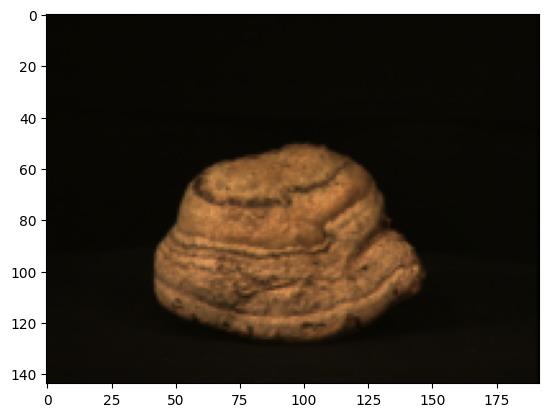

In [103]:
testnumber = 70
path = 'aloi_red4_col/png4/'+ str(testnumber) + '/' + str(testnumber) + "_i110.png"
image = mpimg.imread(path)
plt.imshow(image)

In [104]:
#predict material
result = predict_material(image)

In [105]:
#convert binary vector to material
def binarystring_to_material(stringbin):
    material = []
    for i in range(len(stringbin)):
        if stringbin[i] == '1':
            material.append(material_encoding[i])
    return material

In [106]:
print("binary result: " + result)
print("material: " + str(binarystring_to_material(result)))

binary result: 000000010000000000000000000000
material: ['plastic']


In [107]:
label_text = pd.read_csv('annotations_text.csv', dtype={'Material': str,'Stained':str, 'Surface properties': str})

In [108]:
label_text

,Unnamed: 0,No.,Object name,Material,Stained,Surface properties
0,0,1,Christmas bear,['cloth'],['pluriform'],['']
1,1,2,Lab-keys,"['metal', 'cloth']",[''],"['composite', 'shiny']"
2,2,3,Apricot,['fruit'],['uniform'],['']
3,3,4,Round candle,"['candle', 'metal']",[''],"['composite', 'shiny']"
4,4,5,Nut,['wood'],['uniform'],['ribbed']
...,...,...,...,...,...,...
995,995,996,lotion,"['plastic', 'paper']",['pluriform'],"['shiny', 'composite']"
996,996,997,cleansing milk,"['plastic', 'paper']",['pluriform'],"['shiny', 'composite']"
997,997,998,vogue deodorant,"['metal', 'plastic']",['pluriform'],"['shiny', 'composite']"
998,998,999,ALOI recording,"['metal', 'plastic']",['uniform'],"['shiny', 'composite']"


In [84]:
label_text[label_text['No.'] == testnumber]

,Unnamed: 0,No.,Object name,Material,Stained,Surface properties
29,29,30,metal bowl,['metal'],['pluriform'],['shiny']


In [112]:
#list of all materials predicted
for i in range(1, 1000):
    path = 'aloi_red4_col/png4/'+ str(i) + '/' + str(i) + "_i110.png"
    image = mpimg.imread(path)
    result = predict_material(image)
    print("binary result: " + result)
    print("material: " + str(binarystring_to_material(result)))

binary result: 000000000010000000000000000000
material: ['paper']
binary result: 000000010000000000000000000000
material: ['plastic']
binary result: 000000010000000000000000000000
material: ['plastic']
binary result: 000000010000000000000000000000
material: ['plastic']
binary result: 000000010000000000000000000000
material: ['plastic']
binary result: 000000010000000000000000000000
material: ['plastic']
binary result: 000000010000000000000000000000
material: ['plastic']
binary result: 000000010000000000000000000000
material: ['plastic']
binary result: 000000010000000000000000000000
material: ['plastic']
binary result: 000000010000000000000000000000
material: ['plastic']
binary result: 000000010000000000000000000000
material: ['plastic']
binary result: 000000010000000000000000000000
material: ['plastic']
binary result: 000000010000000000000000000000
material: ['plastic']
binary result: 000000010000000000000000000000
material: ['plastic']
binary result: 000000010000000000000000000000
mate